In [91]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotActivity import plotActivity

In [92]:
path_to_outdir = '../data/decomp/mSigAct/'

### Calculate prop from prop1 for custom prop in mSigAct


In [93]:
data_num_mutations = pd.DataFrame()
for exp in glob.glob(path_to_outdir + 'output/raw_output/all_relatable_sbs_prop1/*/*.exposure.csv'):
    df_exp = pd.read_csv(exp)
    df_exp['Type'] = df_exp.columns[1]
    df_exp = df_exp.rename(columns={df_exp.columns[0]:"SBS", df_exp.columns[1]:'NumMut'})
    data_num_mutations = pd.concat([data_num_mutations, df_exp], axis=0)

data_num_mutations.head()

,SBS,NumMut,Type
0,SBS12,331,diff_Mammalia__Ts.only
1,SBS23,253,diff_Mammalia__Ts.only
2,SBS30,199,diff_Mammalia__Ts.only
3,SBS26,18,diff_Mammalia__Ts.only
0,SBS12,308,low_Actinopteri__Ts.only


In [94]:
sum_sbs = data_num_mutations.groupby('SBS').agg({'NumMut': 'sum'}).reset_index()
sum_sbs['prop'] = sum_sbs['NumMut'] / sum_sbs['NumMut'].sum()
sum_sbs = sum_sbs.sort_values(by='prop', ascending=False)
sum_sbs

,SBS,NumMut,prop
2,SBS12,4754,0.359879
7,SBS23,3773,0.285617
9,SBS30,3380,0.255867
5,SBS2,566,0.042846
8,SBS26,364,0.027555
6,SBS21,204,0.015443
12,SBS6,79,0.005980
10,SBS33,70,0.005299
0,SBS1,8,0.000606
3,SBS17a,5,0.000379


Make table for all test from mSigAct

In [96]:
for test_prop in ['custom_prop', 'all_relatable_sbs_prop1', 'custom_from1']:
    
    data_collect = pd.DataFrame() # tmp

    for exp in glob.glob(path_to_outdir + f'output/raw_output/{test_prop}/*/*.exposure.csv'):

        df_exp = pd.read_csv(exp)
        df_exp['Samples'] = df_exp.columns[1]
        df_exp = df_exp.rename(columns={df_exp.columns[0]:"SBS", df_exp.columns[1]:'NumMut'})
        df_exp = df_exp.pivot(index='Samples', columns='SBS', values='NumMut').reset_index()
        data_collect = pd.concat([data_collect, df_exp], axis=0)
        data_collect = data_collect.fillna(0)
    
    data_collect.to_csv(path_to_outdir + f'output/{test_prop}_Activities.txt', index=False, sep='\t')
    

collect distances of recontructed spectra after assignment

In [97]:
# collect distances of recontructed spectra after assignment
data_distances  = []
for distances_file in glob.glob(path_to_outdir + 'output/raw_output/*/*/*.distances.csv'):
    dist_df = pd.read_csv(distances_file, index_col=0).assign(
        params=distances_file.split('/')[-3],
        sample=distances_file.split('/')[-2],
    )
    data_distances.append(dist_df)
distances = pd.concat(data_distances)
distances.set_index(['params', 'sample']).to_csv('../data/decomp/mSigAct/distances.csv')
distances
distances.to_csv(path_to_outdir + 'output/Distances_mSigAct.csv')

In [4]:
distances[distances.method == 'cosine']

,method,proposed.assignment,QP.assignment,params,sample
5,cosine,0.878813,0.895674,prop1,diff_Actinopterygii__Ts.only
5,cosine,0.885252,0.888863,prop1,diff_Amphibia__Ts...Tv
5,cosine,0.846088,0.886227,prop1,diff_Mammalia__Ts.only
5,cosine,0.922244,0.935189,prop1,high_Actinopterygii__Ts...Tv
5,cosine,0.829110,0.886703,prop1,high_Lepidosauria__Ts.only
...,...,...,...,...,...
5,cosine,0.877167,0.901102,prop05,high_Lepidosauria__Ts...Tv
5,cosine,0.825324,0.885563,prop05,high_Aves__Ts.only
5,cosine,0.874721,0.886599,prop05,diff_Amphibia__Ts.only
5,cosine,0.884055,0.898739,prop05,diff_Mammalia__Ts...Tv


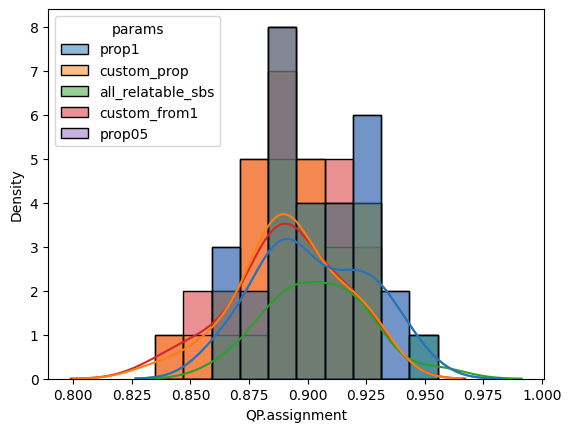

In [5]:
# prop1 == prop05
sns.kdeplot(data=distances[(distances.method == 'cosine')].reset_index(), x='QP.assignment', hue='params');
sns.histplot(data=distances[(distances.method == 'cosine')].reset_index(), x='QP.assignment', hue='params');

In [110]:
#collect activities after assignment
data_activities = []
for try_d in os.listdir(path_to_outdir):
    try_d_full_path = os.path.join(path_to_outdir, try_d)
    if os.path.isdir(try_d_full_path):
        d = []
        for activity_file in glob.glob(try_d_full_path + '/*/*.exposure.csv'):
            act_df = pd.read_csv(activity_file, index_col=0)
            d.append(act_df)
        try_act_df = pd.concat(d, axis=1).assign(params=try_d)
        data_activities.append(try_act_df)

activities = pd.concat(data_activities, axis=0)
activities.index.name = 'signature'
activities = activities.reset_index().set_index(['params', 'signature'])
activities.to_csv('../data/decomp/mSigAct/activities_total.csv')
activities.head()

diff_Actinopterygii__Ts.only  diff_Amphibia__Ts...Tv  \
params signature                                                         
prop1  SBS12                             275.0                   287.0   
       SBS30                             246.0                   206.0   
       SBS23                             231.0                   131.0   
       SBS2                               47.0                    35.0   
       SBS5                                NaN                   209.0   

                  diff_Mammalia__Ts.only  high_Actinopterygii__Ts...Tv  \
params signature                                                         
prop1  SBS12                       488.0                         475.0   
       SBS30                       189.0                         448.0   
       SBS23                       275.0                         138.0   
       SBS2                         11.0                          49.0   
       SBS5                          NaN                         183.0   

                  high_Lepidosauria__Ts.only  high_Aves__Ts...Tv  \
params signature                                                   
prop1  SBS12                           503.0              1010.0   
       SBS30                           128.0               253.0   
       SBS23                           621.0               302.0   
       SBS2                              NaN                63.0   
       SBS5                              NaN                17.0   

                  low_Mammalia__Ts.only  low_Amphibia__Ts...Tv  \
params signature                                                 
prop1  SBS12                      111.0                   89.0   
       SBS30                      155.0                  110.0   
       SBS23                       64.0                   10.0   
       SBS2                        25.0                   28.0   
       SBS5                         NaN                  273.0   

                  diff_Lepidosauria__Ts.only  high_Amphibia__Ts.only  ...  \
params signature                                                      ...   
prop1  SBS12                           398.0                   396.0  ...   
       SBS30                            11.0                   321.0  ...   
       SBS23                           503.0                   345.0  ...   
       SBS2                              NaN                    89.0  ...   
       SBS5                              NaN                     NaN  ...   

                  high_Mammalia__Ts.only  low_Mammalia__Ts...Tv  \
params signature                                                  
prop1  SBS12                       566.0                   90.0   
       SBS30                       281.0                  129.0   
       SBS23                       425.0                   25.0   
       SBS2                         41.0                   19.0   
       SBS5                          NaN                  176.0   

                  low_Amphibia__Ts.only  diff_Lepidosauria__Ts...Tv  \
params signature                                                      
prop1  SBS12                      139.0                       468.0   
       SBS30                      161.0                         8.0   
       SBS23                       68.0                       394.0   
       SBS2                        33.0                         NaN   
       SBS5                         NaN                       107.0   

                  high_Actinopterygii__Ts.only  high_Lepidosauria__Ts...Tv  \
params signature                                                             
prop1  SBS12                             417.0                       617.0   
       SBS30                             313.0                       211.0   
       SBS23                             349.0                       431.0   
       SBS2                               87.0                         NaN   
       SBS5                                NaN                  

In [77]:
custom_colors = [
        '#acf2d0', 
        '#63d69e', 
        '#f8b6b3', 
        '#d9f7b0', 
        '#fae1a5', 
        '#fad682', 
        'tab:pink', 
        'tab:orange', 
        'tab:olive', 
        'tab:purple', 
        '#7852d9',
    ]

### Plot mSigAct with custom function
TODO: custom colors

In [105]:
msig_act_list = glob.glob('../data/decomp/mSigAct/output/*Activities.txt')
for msig_file in msig_act_list:
    activity_name = msig_file.split('/')[-1].split('Activities')[0]
    plotActivity(msig_file, output_file=path_to_outdir + f'output/{activity_name}mSigAct.pdf')

['#f8b6b3', '#fae1a5', '#fcde97', 'tab:pink', 'tab:orange', 'tab:purple']
['#acf2d0', '#f8b6b3', '#f2aeae', '#d9f7b0', '#faf1dc', '#fae1a5', '#fcde97', 'tab:pink', 'tab:orange', 'tab:purple', 'tab:olive', 'tab:brown', 'tab:red']
['#63d69e', '#fcde97', '#fad682', 'tab:pink', 'tab:orange', 'tab:purple', 'tab:olive']


In [50]:
d = activities.melt(ignore_index=False, var_name='sample', value_name='activity').reset_index()
d

,params,signature,sample,activity
0,prop1,SBS12,diff_Actinopterygii__Ts.only,275.0
1,prop1,SBS30,diff_Actinopterygii__Ts.only,246.0
2,prop1,SBS23,diff_Actinopterygii__Ts.only,231.0
3,prop1,SBS2,diff_Actinopterygii__Ts.only,47.0
4,prop1,SBS5,diff_Actinopterygii__Ts.only,NaN
...,...,...,...,...
1645,prop05,SBS30,diff_Actinopterygii__Ts...Tv,311.0
1646,prop05,SBS23,diff_Actinopterygii__Ts...Tv,85.0
1647,prop05,SBS2,diff_Actinopterygii__Ts...Tv,26.0
1648,prop05,SBS5,diff_Actinopterygii__Ts...Tv,232.0


<AxesSubplot:xlabel='signature', ylabel='activity'>

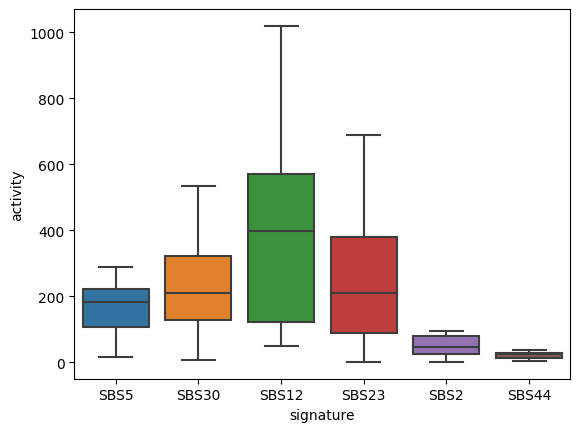

In [131]:
sns.boxplot(data=d, x='signature', y='activity')

<AxesSubplot:xlabel='sample', ylabel='activity'>

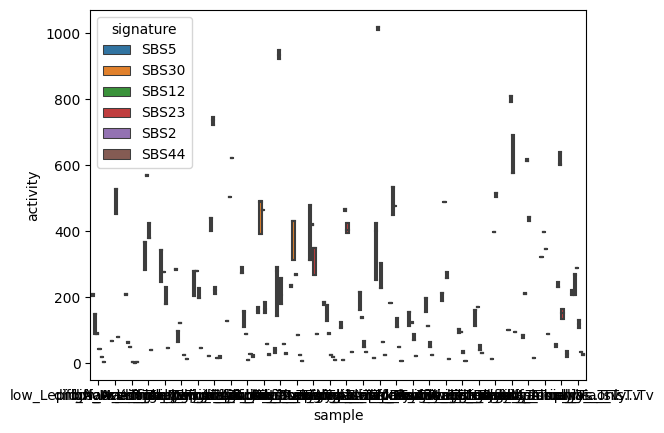

In [135]:
sns.boxplot(data=d, x='sample', y='activity', hue='signature')